<a href="https://colab.research.google.com/github/zayo1511/MetodosOptimizacionIFI/blob/main/Funciones_RLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Valores iniciales
y = [63, 71, 64, 67, 85, 78, 52, 60, 60, 62, 55, 60, 60, 43, 52, 80, 72, 95, 63, 63, 75]
valores = np.array([1.62, 1.83, 1.72, 1.71, 1.84, 1.70, 1.58, 1.70,
                    1.53, 1.62, 1.68, 1.70, 1.71, 1.51, 1.69, 1.82,
                    1.82, 1.78, 1.70, 1.74, 1.83])

x = np.linspace(min(valores)-0.01, max(valores)+0.01, int((max(valores)-min(valores))*2500))

# Crear el DataFrame inicial
df = pd.DataFrame({'Beta 0': 1, 'Estatura': valores})
df.head()

,Beta 0,Estatura
0,1,1.62
1,1,1.83
2,1,1.72
3,1,1.71
4,1,1.84


#**Ruido**

In [3]:
# Sumar una constante a cada columna
def add_noise(scale):
    df = pd.DataFrame({'Beta 0': 1, 'Estatura': valores})
    df['Estatura + Ruido'] = df['Estatura'] + np.random.normal(loc=0, scale=scale, size=len(df))

    covarianza=df.cov()
    correlacion=df.corr()

    print("Covarianza")
    print(covarianza)
    print()
    print("Correlación")
    print(correlacion)


In [4]:
scale = 0.01
add_noise(scale)

Covarianza
                  Beta 0  Estatura  Estatura + Ruido
Beta 0               0.0  0.000000          0.000000
Estatura             0.0  0.009135          0.008809
Estatura + Ruido     0.0  0.008809          0.008611

Correlación
                  Beta 0  Estatura  Estatura + Ruido
Beta 0               NaN       NaN               NaN
Estatura             NaN  1.000000          0.993201
Estatura + Ruido     NaN  0.993201          1.000000


#**Regularización RIDGE con lambda**

In [5]:
#beta grado n con regularización RIDGE
def RIDGE_lambda_reg_n(max_power, lambda_value):
    df = pd.DataFrame({'Beta 0': 1, 'Estatura': valores})

    for power in range(2, max_power + 1):
        new_column_name = f"{'Estatura'}^{power}"
        df[new_column_name] = df['Estatura'] ** power

    xtx=np.dot(df.T, df)
    lambda_I=lambda_value*np.identity(len(xtx))
    XTX_li=xtx+lambda_I
    xty=np.dot(df.T, y)
    XTX_li_inv=np.linalg.inv(XTX_li)
    betas=np.dot(XTX_li_inv, xty)
    y_b = np.polyval(betas[::-1], x)

    print("Beta^" + str(max_power) + " con regularización RIDGE y lambda = \n" + str(lambda_value) + ": " + str(betas))

    plt.figure(figsize=(10, 6))
    plt.scatter(valores, y, c="cornflowerblue")
    plt.plot(x, y_b, c="indianred")
    plt.title("Ajuste de curva beta^" + str(max_power) + " con regularización RIDGE y lambda = " + str(lambda_value))
    plt.xlabel("Estatura (m)")
    plt.ylabel("Peso (Kg)")
    plt.grid()
    plt.show()


Beta^20 con regularización RIDGE y lambda = 
10: [ 0.01405717  0.02430046  0.03964654  0.06219015  0.09404516  0.13704352
  0.19345172  0.26341418  0.34466651  0.43035732  0.50688897  0.55223159
  0.53631458  0.42645028  0.20224912 -0.11559134 -0.42391896 -0.50723883
 -0.10909871  0.63929431 -0.21055026]


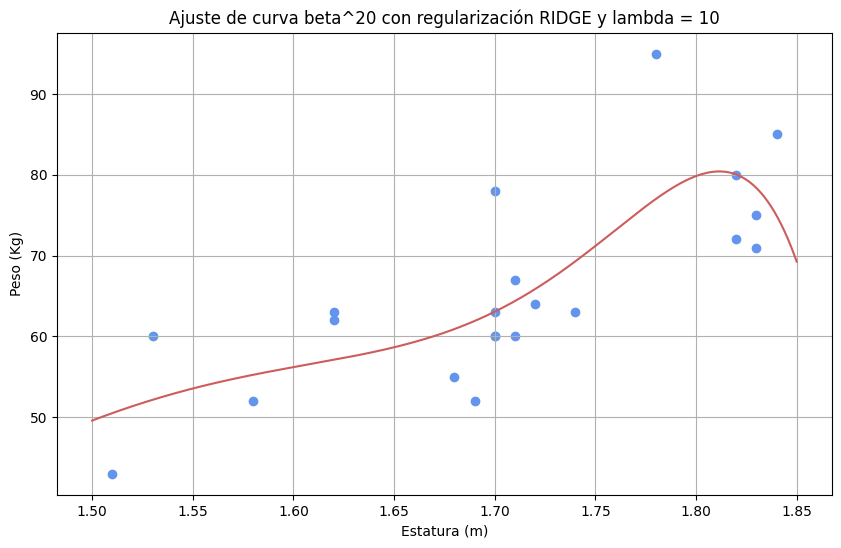

In [6]:
max_power = 20 # Cambia este valor a cualquier potencia máxima
lambda_value = 10

RIDGE_lambda_reg_n(max_power, lambda_value)